In [21]:
import pandas as pd
import numpy as np

file_path = 'C:/Users/Maks/Desktop/Car_Insurance_Claim.csv'
car_ins = pd.read_csv(file_path, header=0)
car_ins = car_ins.drop(car_ins.columns[0], axis=1)
car_ins = car_ins.drop(columns=['MARRIED', 'CHILDREN', 'RACE', 'GENDER', 'EDUCATION'])
car_ins['AGE'] = car_ins['AGE'].replace('none', np.nan)
car_ins['DRIVING_EXPERIENCE'] = car_ins['DRIVING_EXPERIENCE'].replace('none', np.nan)
car_ins['VEHICLE_OWNERSHIP'] = car_ins['VEHICLE_OWNERSHIP'].replace('none', np.nan)

car_ins.loc[car_ins['VEHICLE_OWNERSHIP'].notna(), 'VEHICLE_OWNERSHIP'] = car_ins.loc[car_ins['VEHICLE_OWNERSHIP'].notna(), 'VEHICLE_OWNERSHIP'].astype(float).astype(int)
car_ins['VEHICLE_YEAR'] = car_ins['VEHICLE_YEAR'].replace('none', np.nan)
car_ins['POSTAL_CODE'] = car_ins['POSTAL_CODE'].replace('none', np.nan)
car_ins.loc[car_ins['POSTAL_CODE'].notna(), 'POSTAL_CODE'] = car_ins.loc[car_ins['POSTAL_CODE'].notna(), 'POSTAL_CODE'].astype(float).astype(int)
car_ins['VEHICLE_TYPE'] = car_ins['VEHICLE_TYPE'].replace('none', np.nan)

car_ins['ANNUAL_MILEAGE'] = car_ins['ANNUAL_MILEAGE'].replace('none', np.nan).astype(float)
car_ins['SPEEDING_VIOLATIONS'] = car_ins['SPEEDING_VIOLATIONS'].replace('none', np.nan)
car_ins.loc[car_ins['SPEEDING_VIOLATIONS'].notna(), 'SPEEDING_VIOLATIONS'] = car_ins.loc[car_ins['SPEEDING_VIOLATIONS'].notna(), 'SPEEDING_VIOLATIONS'].astype(float).astype(int)
car_ins['DUIS'] = car_ins['DUIS'].replace('none', np.nan)
car_ins.loc[car_ins['DUIS'].notna(), 'DUIS'] = car_ins.loc[car_ins['DUIS'].notna(), 'DUIS'].astype(float).astype(int)
car_ins['PAST_ACCIDENTS'] = car_ins['PAST_ACCIDENTS'].replace('none', np.nan)
car_ins.loc[car_ins['PAST_ACCIDENTS'].notna(), 'PAST_ACCIDENTS'] = car_ins.loc[car_ins['PAST_ACCIDENTS'].notna(), 'PAST_ACCIDENTS'].astype(float).astype(int)
car_ins['OUTCOME'] = car_ins['OUTCOME'].replace({'0.0': 'Received', '1.0': 'Not Received'})
car_ins['OUTCOME'] = car_ins['OUTCOME'].replace('none', np.nan)
car_ins


,ID,AGE,DRIVING_EXPERIENCE,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,0-9y,upper class,0.629027313918201,1,after 2015,10238,12000.0,sedan,0,0,0,Received
1,750365,16-25,0-9y,poverty,0.3577571170184627,0,before 2015,10238,16000.0,sedan,0,0,0,Not Received
2,199901,16-25,0-9y,working class,0.4931457852181982,1,before 2015,10238,11000.0,sedan,0,0,0,Received
3,478866,16-25,0-9y,working class,0.2060128507324556,1,before 2015,32765,11000.0,sedan,0,0,0,Received
4,731664,26-39,10-19y,working class,0.3883658881572184,1,before 2015,32765,12000.0,sedan,2,0,1,Not Received
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,10-19y,upper class,0.5827870696562382,1,before 2015,10238,16000.0,sedan,0,0,1,Received
9996,910346,26-39,10-19y,middle class,0.5222314755016938,1,after 2015,32765,NaN,sedan,1,0,0,Received
9997,468409,26-39,0-9y,middle class,0.4709402314479679,1,before 2015,10238,14000.0,sedan,0,0,0,Received
9998,903459,26-39,10-19y,poverty,0.3641847847297929,0,before 2015,10238,13000.0,sedan,2,0,1,Not Received


In [2]:
desc_stats = car_ins.describe(include='all')
print(desc_stats)

                   ID    AGE DRIVING_EXPERIENCE       INCOME CREDIT_SCORE  \
count    10000.000000   9900               9900        10000         8978   
unique            NaN      4                  4            4         8929   
top               NaN  26-39               0-9y  upper class         none   
freq              NaN   3035               3503         4336           50   
mean    500521.906800    NaN                NaN          NaN          NaN   
std     290030.768758    NaN                NaN          NaN          NaN   
min        101.000000    NaN                NaN          NaN          NaN   
25%     249638.500000    NaN                NaN          NaN          NaN   
50%     501777.000000    NaN                NaN          NaN          NaN   
75%     753974.500000    NaN                NaN          NaN          NaN   
max     999976.000000    NaN                NaN          NaN          NaN   

        VEHICLE_OWNERSHIP VEHICLE_YEAR  POSTAL_CODE  ANNUAL_MILEAGE  \
coun

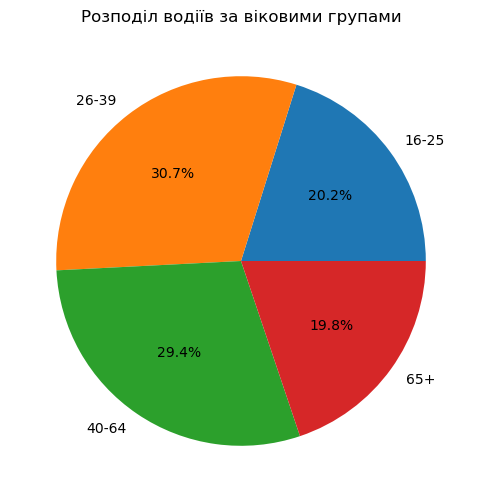

In [3]:
import matplotlib.pyplot as plt

age_group_counts = car_ins['AGE'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.pie(age_group_counts.values, labels=age_group_counts.index, autopct='%1.1f%%')
plt.title('Розподіл водіїв за віковими групами')
plt.show()


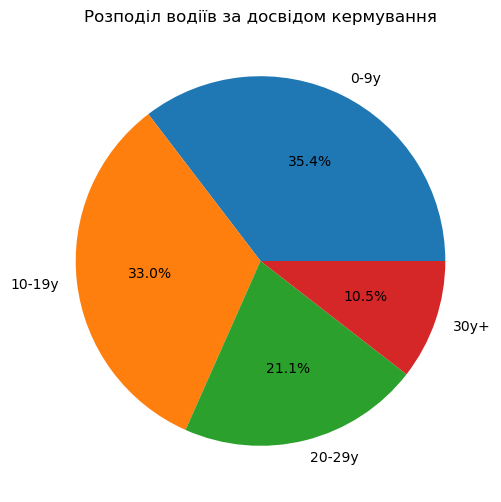

In [4]:
exp_group_counts = car_ins['DRIVING_EXPERIENCE'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.pie(exp_group_counts.values, labels=exp_group_counts.index, autopct='%1.1f%%')
plt.title('Розподіл водіїв за досвідом кермування')
plt.show()

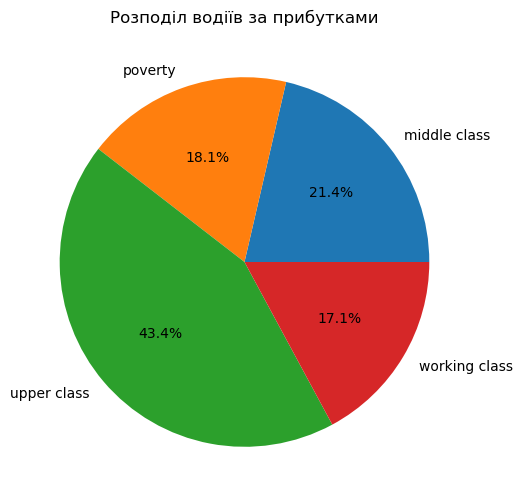

In [5]:
income_group_counts = car_ins['INCOME'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.pie(income_group_counts.values, labels=income_group_counts.index, autopct='%1.1f%%')
plt.title('Розподіл водіїв за прибутками')
plt.show()

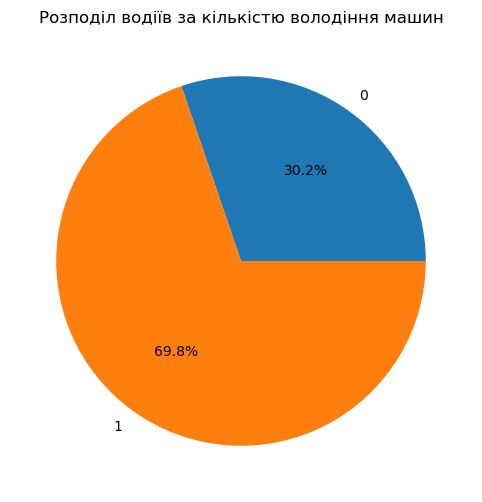

In [6]:
own_group_counts = car_ins['VEHICLE_OWNERSHIP'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.pie(own_group_counts.values, labels=own_group_counts.index, autopct='%1.1f%%')
plt.title('Розподіл водіїв за кількістю володіння машин')
plt.show()

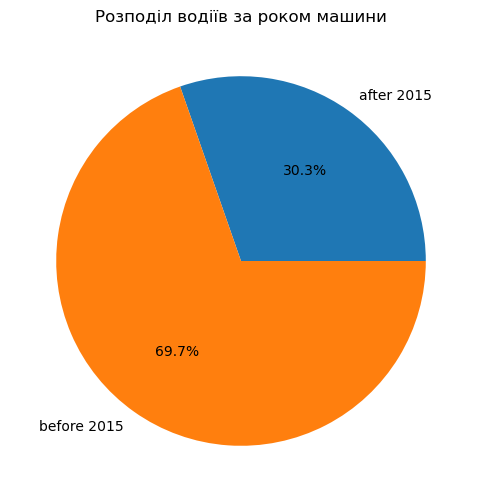

In [7]:
vehyear_group_counts = car_ins['VEHICLE_YEAR'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.pie(vehyear_group_counts.values, labels=vehyear_group_counts.index, autopct='%1.1f%%')
plt.title('Розподіл водіїв за роком машини')
plt.show()

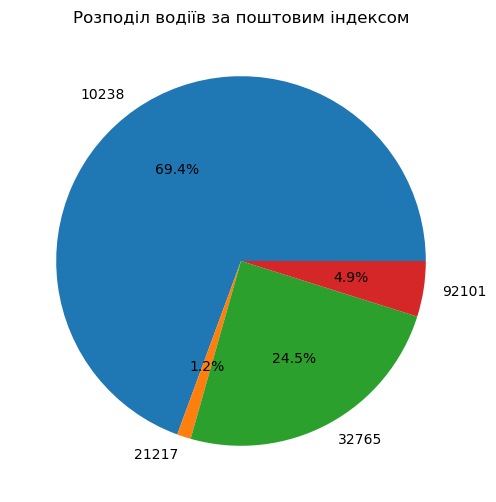

In [8]:
poscode_group_counts = car_ins['POSTAL_CODE'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.pie(poscode_group_counts.values, labels=poscode_group_counts.index, autopct='%1.1f%%')
plt.title('Розподіл водіїв за поштовим індексом')
plt.show()

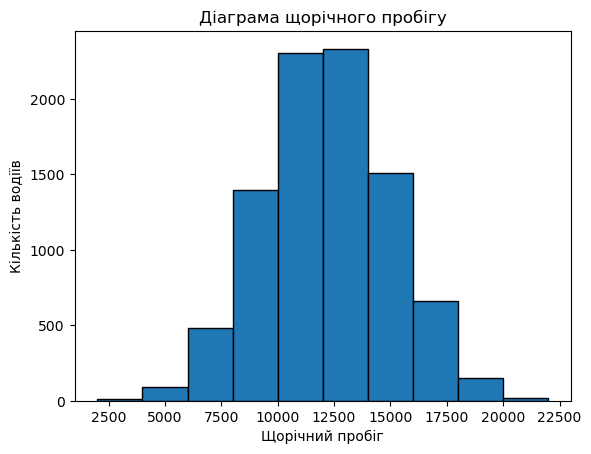

In [9]:
plt.hist(car_ins['ANNUAL_MILEAGE'], bins=10, edgecolor='black')
plt.xlabel('Щорічний пробіг')
plt.ylabel('Кількість водіїв')
plt.title('Діаграма щорічного пробігу')

plt.show()

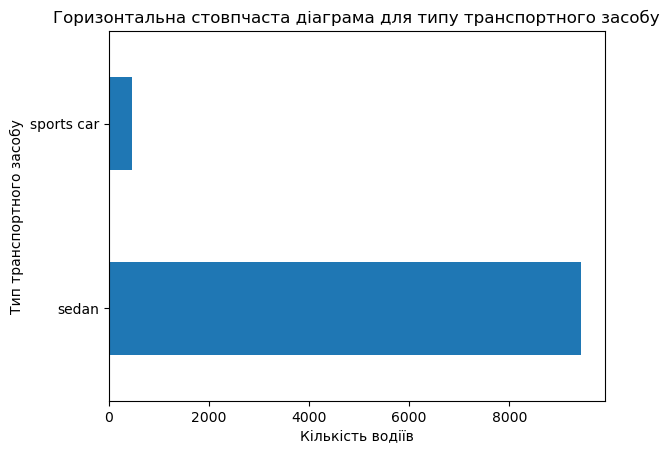

In [10]:
car_ins['VEHICLE_TYPE'].value_counts().plot(kind='barh')
plt.ylabel('Тип транспортного засобу')
plt.xlabel('Кількість водіїв')
plt.title('Горизонтальна стовпчаста діаграма для типу транспортного засобу')
plt.show()



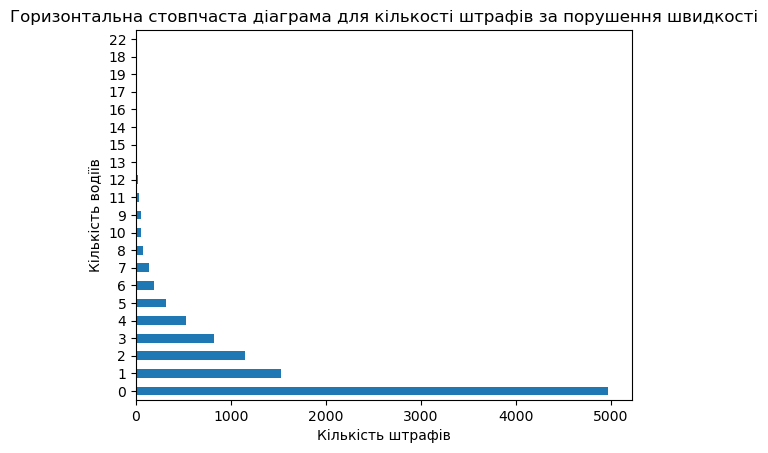

In [11]:
car_ins['SPEEDING_VIOLATIONS'].value_counts().plot(kind='barh')
plt.ylabel('Кількість водіїв')
plt.xlabel('Кількість штрафів')
plt.title('Горизонтальна стовпчаста діаграма для кількості штрафів за порушення швидкості')
plt.show()

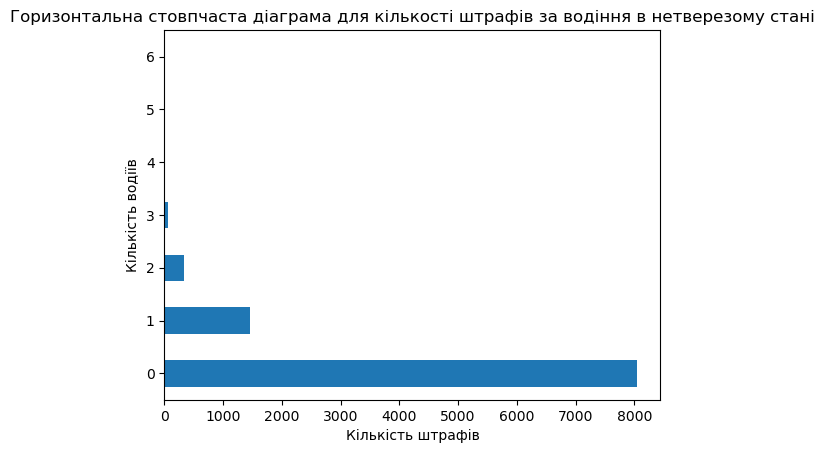

In [12]:
car_ins['DUIS'].value_counts().plot(kind='barh')
plt.ylabel('Кількість водіїв')
plt.xlabel('Кількість штрафів')
plt.title('Горизонтальна стовпчаста діаграма для кількості штрафів за водіння в нетверезому стані')
plt.show()

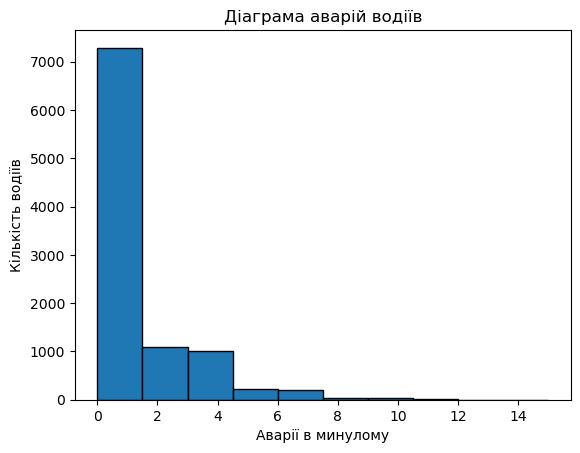

In [14]:
plt.hist(car_ins['PAST_ACCIDENTS'], bins=10, edgecolor='black')
plt.xlabel('Аварії в минулому')
plt.ylabel('Кількість водіїв')
plt.title('Діаграма аварій водіїв')

plt.show()

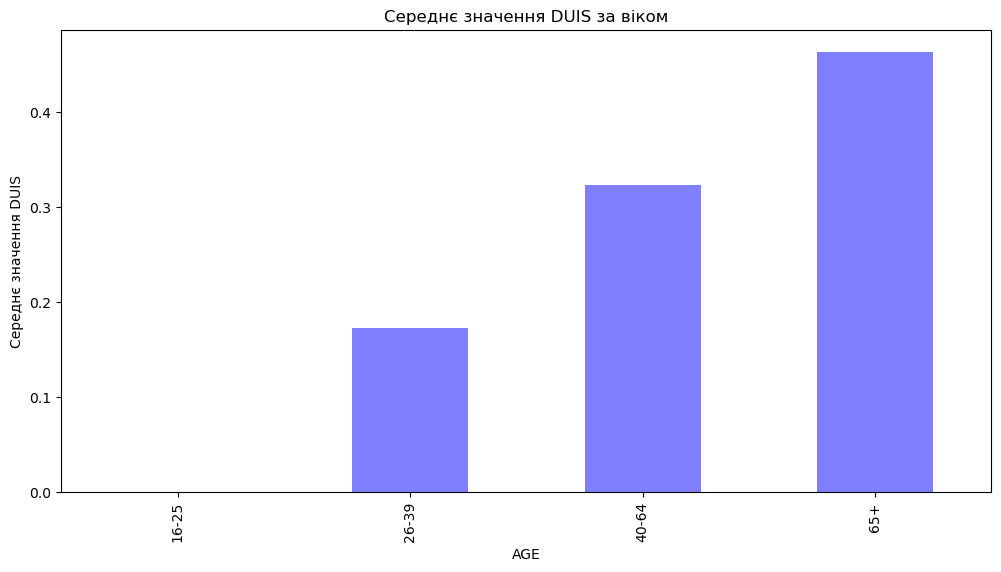

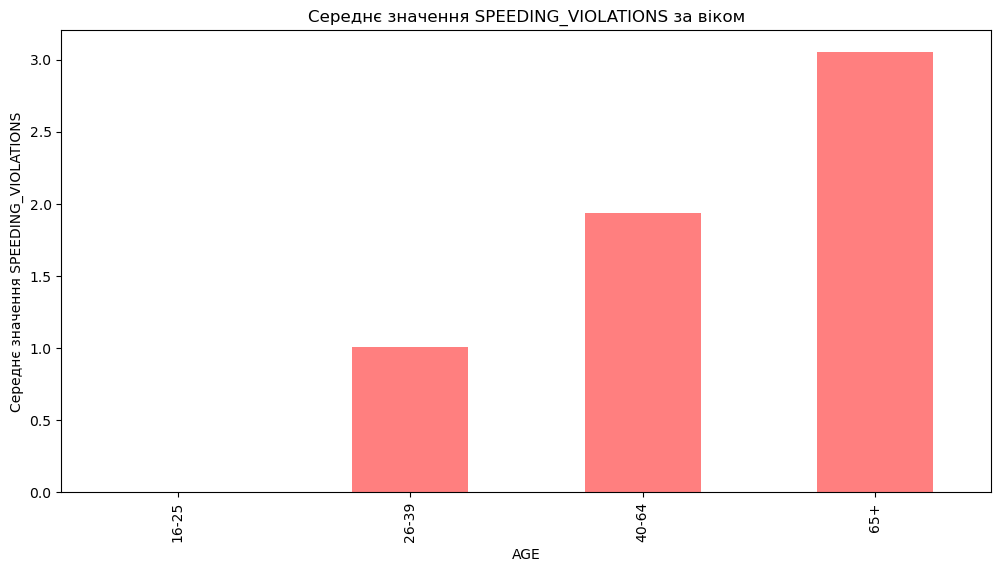

In [22]:
car_ins.groupby('AGE')['DUIS'].mean().plot(kind='bar', figsize=(12, 6), color='b', alpha=0.5)
plt.ylabel('Середнє значення DUIS')
plt.title('Середнє значення DUIS за віком')
plt.show()

car_ins.groupby('AGE')['SPEEDING_VIOLATIONS'].mean().plot(kind='bar', figsize=(12, 6), color='r', alpha=0.5)
plt.ylabel('Середнє значення SPEEDING_VIOLATIONS')
plt.title('Середнє значення SPEEDING_VIOLATIONS за віком')
plt.show()


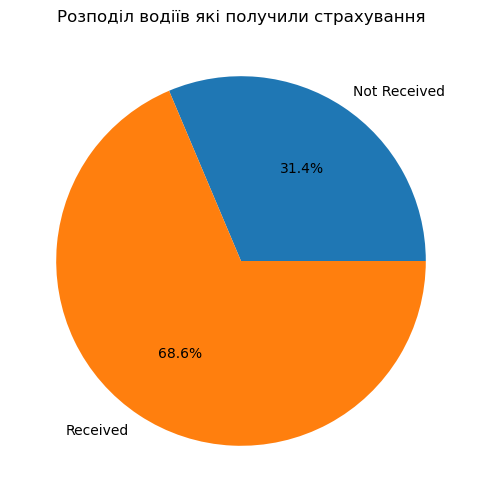

In [18]:
outcome_group_counts = car_ins['OUTCOME'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.pie(outcome_group_counts.values, labels=outcome_group_counts.index, autopct='%1.1f%%')
plt.title('Розподіл водіїв які получили страхування')
plt.show()

In [20]:
conclusions = """
На основі поданих візуалізованих даних з таблиці, можна побачити що:

1. Переважно водійські права мають люди від 26-39 років. На 1,3% менше людей з таблиці мають права люди категорії 40-64 роки.
2. Також переважно водії мають досвід кермування до 9 років. Проте на 2,4% менше водіїв мають досвід від 10 до 19 років.
3. Безперечна більшість водіїв за прибутками, а точніше 43,4% є upper class.
4. Майже 2/3 водіїв мають у володінні свою машину.
5. 69,7% водіїв мають машину до 2015 року.
6. Зазвичай річний пробіг коливається від 10000 км до 14000 км.
7. Практично більшість водіїв використовують тип кузова седан.
8. Майже половина водіїв не мають штрафів за перевищення швидкості, проте в деяких є пару.
9. У 80% водіїв немає штрафу за кермування у нетверезому стані, проте є й випадки коли вони були.
10. У 70%+ водіїв не було аварій в минулому, але у пару осіб було до 12 аварій.
11. Якщо ми поглянем на два перед останні графіки то можем побачити що з збільшеням років, збільшується штрафи, такі як кермування в нетверезому стані і перевищення швидкості. У обох випадках прогресія збільшується майже вдвічі.
12. І на останній секторній діаграмі можем побачити за висновками всіх діаграм можем побачити що страхування отримали 68,6% водіїв. 
"""
print(conclusions)



На основі поданих візуалізованих даних з таблиці, можна побачити що:

1. Переважно водійські права мають люди від 26-39 років. На 1,3% менше людей з таблиці мають права люди категорії 40-64 роки.
2. Також переважно водії мають досвід кермування до 9 років. Проте на 2,4% менше водіїв мають досвід від 10 до 19 років.
3. Безперечна більшість водіїв за прибутками, а точніше 43,4% є upper class.
4. Майже 2/3 водіїв мають у володінні свою машину.
5. 69,7% водіїв мають машину до 2015 року.
6. Зазвичай річний пробіг коливається від 10000 км до 14000 км.
7. Практично більшість водіїв використовують тип кузова седан.
8. Майже половина водіїв не мають штрафів за перевищення швидкості, проте в деяких є пару.
9. У 80% водіїв немає штрафу за кермування у нетверезому стані, проте є й випадки коли вони були.
10. У 70%+ водіїв не було аварій в минулому, але у пару осіб було до 12 аварій.
11. Якщо ми поглянем на два перед останні графіки то можем побачити що з збільшеням років, збільшується штрафи, так